In [1]:
from qiskit_algorithms.minimum_eigensolvers import VQE
from qiskit_nature.second_q.transformers import FreezeCoreTransformer
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo
from qiskit_nature.second_q.mappers import ParityMapper,BravyiKitaevMapper
from qiskit_nature.second_q.circuit.library import UCCSD, HartreeFock
from qiskit_algorithms.optimizers import SLSQP,COBYLA
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_aer.primitives import Estimator
import matplotlib.pyplot as plt
import numpy as np
import psi4
from scipy.signal import find_peaks

In [7]:

def classic_beh2(memory = '3 GB'):
    # Set memory and output file
    psi4.set_memory(memory)
    psi4.core.set_output_file('beh2_energy_plot.dat', False)

    # Define a range of atomic distances to calculate the energy for
    atomic_distances = np.arange(1.2, 1.4, 0.01)  # in Angstroms

    # Arrays to store energies
    exact_energies = []
    vqe_energies = []  # You would fill this with your VQE calculated energies

    # Loop over the atomic distances and calculate the exact energy using Psi4
    for distance in atomic_distances:
        # Define the molecule at the current distance
        beh2 = psi4.geometry(f"""
        0 1
        Be
        H 1 {distance}
        H 1 {distance} 2 180.0
        """)

        # Set the basis and options
        psi4.set_options({'basis': 'sto-6g', 'reference': 'rhf'})

        # Calculate the energy
        energy = psi4.energy('scf')
        exact_energies.append(energy)

        print(f'Ground state energy of BeH2 using sto-6G basis set: {energy} Hartree')
        # Placeholder for VQE energy calculation
        # vqe_energies.append(run_vqe(beh2))
        # You would replace the above line with the actual call to your VQE calculation
        # vqe_energies.append(energy)  # This is a placeholder

    # Convert atomic distances to Angstroms for the plot
    # atomic_distances *= 0.529177  # Convert from Bohr radii to Angstroms if necessary

    # Plot the energies
    return atomic_distances, exact_energies
    

def classic_lih2(memory = '2 GB'):
    # Set memory and output file
    psi4.set_memory(memory)
    psi4.core.set_output_file('beh2_energy_plot.dat', False)

    # Define a range of atomic distances to calculate the energy for
    atomic_distances = np.arange(1, 2, 0.02)  # in Angstroms

    # Arrays to store energies
    exact_energies = []
    vqe_energies = []  # You would fill this with your VQE calculated energies

    # Loop over the atomic distances and calculate the exact energy using Psi4
    for distance in atomic_distances:
        # Define the molecule at the current distance
        lih = psi4.geometry(f"""
            0 1
            Li
            H 1 {distance}
            """)

        # Set the basis and options
        psi4.set_options({'basis': 'sto-6g', 'reference': 'rhf'})

        # Calculate the energy
        energy = psi4.energy('scf')
        exact_energies.append(energy)

        # Placeholder for VQE energy calculation
        # vqe_energies.append(run_vqe(beh2))
        # You would replace the above line with the actual call to your VQE calculation
        # vqe_energies.append(energy)  # This is a placeholder

    # Convert atomic distances to Angstroms for the plot
    # atomic_distances *= 0.529177  # Convert from Bohr radii to Angstroms if necessary

    # Plot the energies
    return atomic_distances, exact_energies


def classic_HCNO(memory = '2 GB'):
    # Set memory
    psi4.set_memory('2 GB')
    psi4.core.set_output_file('fulminic_acid_output.dat', False)
    exact_energies = []

    atomic_distances = np.linspace(0.5, 4.0, 30)

    for dist in atomic_distances:
        # Define the molecule, Fulminic acid (HCNO)
        fulminic_acid = psi4.geometry(f"""
        0 1
        H
        C 1 {dist}
        N 2 1.2 1 180.0
        O 3 1.15 2 120.0 1 0.0
        """)


        # Set computation options
        psi4.set_options({
            'basis': '6-31G',  # Use the 6-31G basis set
            'reference': 'rhf',  # Restricted Hartree-Fock
            'scf_type': 'pk',    # Integral transformation algorithm
            'e_convergence': 1e-8,
            'd_convergence': 1e-8
        })

        # Compute the ground state energy
        energy = psi4.energy('scf')
        exact_energies.append(energy)
        # Print the results
        print(f'Ground state energy of Fulminic acid (HCNO) using 6-31G basis set: {energy} Hartree')
        
        #plot
        # Convert atomic distances to Angstroms for the plot
        # atomic_distances *= 0.529177  # Convert from Bohr radii to Angstroms if necessary

        # Plot the energies
    return atomic_distances, exact_energies

# atomic_distances, e = classic_HCNO()
# plt.title('HCNO theoretical ground state energy plot')
# plt.plot(atomic_distances, e)
# plt.xlabel('Atomic distance (Angstrom)')
# plt.ylabel('Energy (Hartree)')
# plt.show()

def classic_h2(memory='2 GB'):
    # Set memory and output file
    psi4.set_memory(memory)
    psi4.core.set_output_file('h2_energy_plot.dat', False)

    # Define a range of atomic distances to calculate the energy for
    atomic_distances = np.linspace(0.2, 4.0, 30)  # in Angstroms

    # Arrays to store energies
    exact_energies = []
    vqe_energies = []  # You would fill this with your VQE calculated energies

    # Loop over the atomic distances and calculate the exact energy using Psi4
    for distance in atomic_distances:
        # Define the molecule at the current distance
        h2 = psi4.geometry(f"""
            0 1
            H
            H 1 {distance}
            """)

        # Set the basis and options
        psi4.set_options({'basis': 'sto-3g', 'reference': 'rhf'})

        # Calculate the energy
        energy = psi4.energy('scf')
        exact_energies.append(energy)

        # Placeholder for VQE energy calculation
        # vqe_energies.append(run_vqe(h2))
        # You would replace the above line with the actual call to your VQE calculation
        # vqe_energies.append(energy)  # This is a placeholder

    # Convert atomic distances to Angstroms for the plot
    # atomic_distances *= 0.529177  # Convert from Bohr radii to Angstroms if necessary

    # Plot the energies
    return atomic_distances, exact_energies


def classic_h2o(memory='2 GB'):
    # Set memory and output file
    psi4.set_memory(memory)
    psi4.core.set_output_file('h2o_energy_plot.dat', False)

    # Define a range of O-H bond distances to calculate the energy for
    # Note: Typically, the bond angle in water is 104.5 degrees, and we keep that constant here.
    # You might want to vary the bond angle as well for a more thorough analysis.
    oh_distances = np.linspace(0.8, 3, 30)  # in Angstroms
    bond_angle = 104.5  # HOH bond angle in degrees

    # Arrays to store energies
    exact_energies = []

    # Loop over the O-H distances and calculate the exact energy using Psi4
    for oh_distance in oh_distances:
        # Define the molecule at the current distance and bond angle
        h2o = psi4.geometry(f"""
            0 1
            O
            H 1 {oh_distance}
            H 1 {oh_distance} 2 {bond_angle}
            """)

        # Set the basis and options
        psi4.set_options({'basis': 'sto-6g', 'reference': 'rhf'})

        # Calculate the energy
        energy = psi4.energy('scf')
        exact_energies.append(energy)

    # Convert O-H distances to Angstroms for the plot
    # oh_distances *= 0.529177  # Convert from Bohr radii to Angstroms if necessary

    # Plot the energies
    return oh_distances, exact_energies

        

def classic_h_oh(memory='2 GB'):
    # Set memory and output file
    psi4.set_memory(memory)
    psi4.core.set_output_file('h2o_energy_plot.dat', False)

    # Define a range of O-H bond distances to calculate the energy for
    # Note: Typically, the bond angle in water is 104.5 degrees, and we keep that constant here.
    # You might want to vary the bond angle as well for a more thorough analysis.
    oh_distances = np.arange(0.5, 2.8, 100)  # in Angstroms
    bond_angle = 104.5  # HOH bond angle in degrees

    # Arrays to store energies
    exact_energies = []

    # Loop over the O-H distances and calculate the exact energy using Psi4
    for oh_distance in oh_distances:
        # Define the molecule at the current distance and bond angle
        h2o = psi4.geometry(f"""
            0 1
            O
            H 1 {oh_distance}
            H 1 {oh_distance} 2 180
            """)

        # Set the basis and options
        psi4.set_options({'basis': 'sto-6g', 'reference': 'rhf'})

        # Calculate the energy
        energy = psi4.energy('scf')
        exact_energies.append(energy)
        print("At distance", oh_distance, "the energy is", energy)

    # Convert O-H distances to Angstroms for the plot
    # oh_distances *= 0.529177  # Convert from Bohr radii to Angstroms if necessary

    # Plot the energies
    return oh_distances, exact_energies

# plt.plot(classic_h2o()[0], classic_h2o()[1])
# plt.plot(classic_h_oh()[0], classic_h_oh()[1])


        


In [16]:
def get_qubit_op(dist):
    # Define Molecule
    molecule = MoleculeInfo(
        symbols=["Li", "H"],
        coords=([0.0, 0.0, 0.0], [dist, 0.0, 0.0]),
        multiplicity=1,  # = 2*spin + 1
        charge=0,
    )

    driver = PySCFDriver.from_molecule(molecule,basis='sto6g')

    # Get properties
    properties = driver.run()

    # Now you can get the reduced electronic structure problem
    problem = FreezeCoreTransformer(
        freeze_core=True, remove_orbitals=[-3, -2]
    ).transform(properties)

    num_particles = problem.num_particles
    num_spatial_orbitals = problem.num_spatial_orbitals

    mapper = BravyiKitaevMapper()
    qubit_op = mapper.map(problem.second_q_ops()[0])
    return qubit_op, num_particles, num_spatial_orbitals, problem, mapper


Interatomic Distance: 1.0 VQE Result: -7.85847
Interatomic Distance: 1.02 VQE Result: -7.86811
Interatomic Distance: 1.04 VQE Result: -7.87701
Interatomic Distance: 1.06 VQE Result: -7.88520
Interatomic Distance: 1.08 VQE Result: -7.89274
Interatomic Distance: 1.1 VQE Result: -7.89966
Interatomic Distance: 1.12 VQE Result: -7.90601
Interatomic Distance: 1.14 VQE Result: -7.91182
Interatomic Distance: 1.16 VQE Result: -7.91712
Interatomic Distance: 1.18 VQE Result: -7.92195
Interatomic Distance: 1.2 VQE Result: -7.92634
Interatomic Distance: 1.22 VQE Result: -7.93030
Interatomic Distance: 1.24 VQE Result: -7.93388
Interatomic Distance: 1.26 VQE Result: -7.93708
Interatomic Distance: 1.28 VQE Result: -7.93993
Interatomic Distance: 1.3 VQE Result: -7.94246
Interatomic Distance: 1.32 VQE Result: -7.94468
Interatomic Distance: 1.34 VQE Result: -7.94662
Interatomic Distance: 1.36 VQE Result: -7.94827
Interatomic Distance: 1.38 VQE Result: -7.94968
Interatomic Distance: 1.4 VQE Result: -7.950

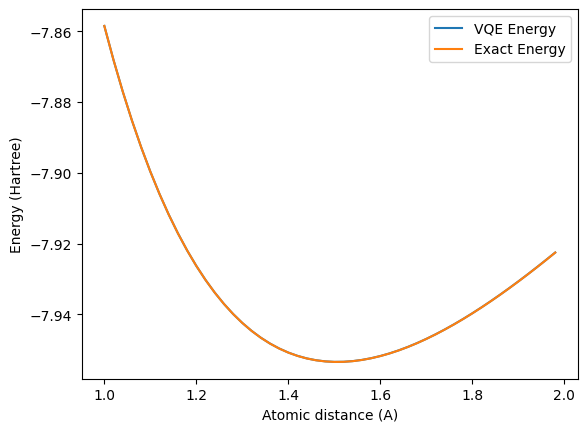

The peaks of the classical energy are -7.953478198377329
The peaks of the vqe energy are -7.953461619542776
The distances of the peaks of the classical energy are 1.5000000000000004
The distances of the peaks of the vqe energy are 1.5000000000000004


In [17]:

distances = np.arange(1, 2, 0.02)
vqe_energies = []
optimizer = COBYLA(maxiter=10)
noiseless_estimator = Estimator(approximation=True)

for dist in distances:
    (qubit_op, num_particles, num_spatial_orbitals, problem, mapper) = get_qubit_op(dist)

    init_state = HartreeFock(num_spatial_orbitals, num_particles, mapper)
    var_form = UCCSD(
        num_spatial_orbitals, num_particles, mapper, initial_state=init_state
    )
    vqe = VQE(
        noiseless_estimator,
        var_form,
        optimizer,
        initial_point=[0] * var_form.num_parameters,
    )
    vqe_calc = vqe.compute_minimum_eigenvalue(qubit_op)
    vqe_result = problem.interpret(vqe_calc).total_energies[0].real
    vqe_energies.append(vqe_result)
    print(f"Interatomic Distance: {np.round(dist, 2)} VQE Result: {vqe_result:.5f}")

print("All energies have been calculated")
classic_distances, classic_energies = classic_lih2()

plt.plot(distances, vqe_energies,label="VQE Energy")
plt.plot(classic_distances, classic_energies,label="Exact Energy")
plt.xlabel("Atomic distance (A)")
plt.ylabel("Energy (Hartree)")
plt.legend()
plt.show()

peaks_classical = min(classic_energies)
peaks_vqe = min(vqe_energies)


print("The peaks of the classical energy are", peaks_classical)
print("The peaks of the vqe energy are", peaks_vqe)


#find the distance of the peaks
distance_classical = classic_distances[np.argmin(classic_energies)]
distance_vqe = distances[np.argmin(vqe_energies)]

print("The distances of the peaks of the classical energy are", distance_classical)
print("The distances of the peaks of the vqe energy are", distance_vqe)



In [1]:
classic_distances, classic_energies = classic_lih2()
plt.title("$LiH$ ground state energy simulation")
plt.plot(distances, vqe_energies,'o',label="VQE Energy")
plt.plot(classic_distances, classic_energies,label="Exact Energy")
plt.xlabel("Atomic distance (A)")
plt.ylabel("Energy (Hartree)")
plt.legend()


NameError: name 'classic_lih2' is not defined

In [9]:
def get_qubit_op(dist):
    # Define Molecule
    molecule = MoleculeInfo(
        symbols=["Be", "H", "H"],
        coords=([0.0, 0.0, 0.0],[0.0, 0.0, -dist], [ 0.0, 0.0,dist]),
        multiplicity=1,  # = 2*spin + 1
        charge=0,
    )
    driver = PySCFDriver.from_molecule(molecule)

    # Get properties
    properties = driver.run()

    # Now you can get the reduced electronic structure problem
    problem = FreezeCoreTransformer(
        freeze_core=True, remove_orbitals=[-3, -2]
    ).transform(properties)

    num_particles = problem.num_particles
    num_spatial_orbitals = problem.num_spatial_orbitals

    mapper = BravyiKitaevMapper()
    qubit_op = mapper.map(problem.second_q_ops()[0])
    return qubit_op, num_particles, num_spatial_orbitals, problem, mapper


test
test2
Interatomic Distance: 1.2 VQE Result: -15.55359
test
test2
Interatomic Distance: 1.21 VQE Result: -15.55529
test
test2
Interatomic Distance: 1.22 VQE Result: -15.55676
test
test2
Interatomic Distance: 1.23 VQE Result: -15.55801
test
test2
Interatomic Distance: 1.24 VQE Result: -15.55905
test
test2
Interatomic Distance: 1.25 VQE Result: -15.55989
test
test2
Interatomic Distance: 1.26 VQE Result: -15.56053
test
test2
Interatomic Distance: 1.27 VQE Result: -15.56099
test
test2
Interatomic Distance: 1.28 VQE Result: -15.56126
test
test2
Interatomic Distance: 1.29 VQE Result: -15.56135
test
test2
Interatomic Distance: 1.3 VQE Result: -15.56128
test
test2
Interatomic Distance: 1.31 VQE Result: -15.56104
test
test2
Interatomic Distance: 1.32 VQE Result: -15.56065
test
test2
Interatomic Distance: 1.33 VQE Result: -15.56010
test
test2
Interatomic Distance: 1.34 VQE Result: -15.55941
test
test2
Interatomic Distance: 1.35 VQE Result: -15.55857
test
test2
Interatomic Distance: 1.36 VQE 

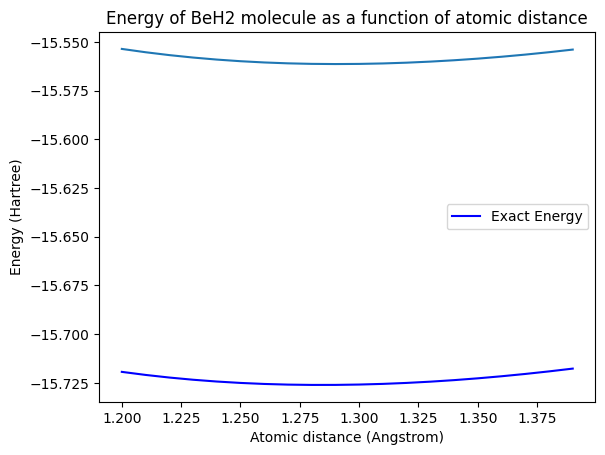

In [10]:
from qiskit_aer.primitives import Estimator

distances = np.arange(1.2, 1.4, 0.01)
vqe_energies = []
optimizer = COBYLA(maxiter=10)
noiseless_estimator = Estimator(approximation=True)

for dist in distances:
    (qubit_op, num_particles, num_spatial_orbitals, problem, mapper) = get_qubit_op(dist)

    init_state = HartreeFock(num_spatial_orbitals, num_particles, mapper)
    var_form = UCCSD(
        num_spatial_orbitals, num_particles, mapper, initial_state=init_state
    )
    vqe = VQE(
        noiseless_estimator,
        var_form,
        optimizer,
        initial_point=[0] * var_form.num_parameters,
    )
    print("test")
    vqe_calc = vqe.compute_minimum_eigenvalue(qubit_op)
    print("test2")
    vqe_result = problem.interpret(vqe_calc).total_energies[0].real
    vqe_energies.append(vqe_result)
    print(f"Interatomic Distance: {np.round(dist, 2)} VQE Result: {vqe_result:.5f}")

print("All energies have been calculated")
atomic_distances, exact_energies = classic_beh2()
plt.plot(distances, vqe_energies)
plt.plot(atomic_distances, exact_energies, label='Exact Energy', color='blue')
plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy of BeH2 molecule as a function of atomic distance')
plt.legend()
plt.show()



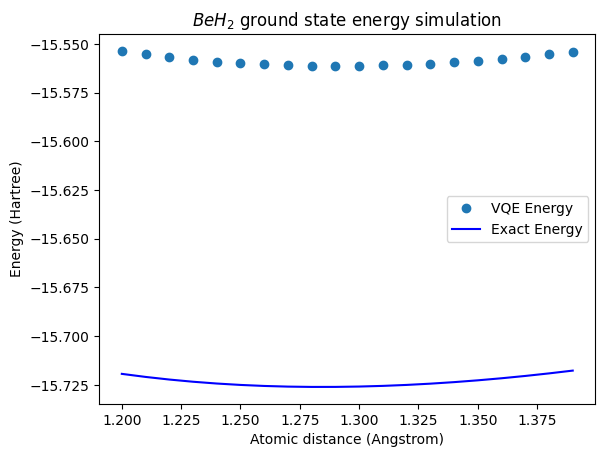

The peaks of the classical energy are -15.726035870527644
The peaks of the vqe energy are -15.561352562670669
The distances of the peaks of the classical energy are 1.28
The distances of the peaks of the vqe energy are 1.29


In [11]:
# atomic_distances, exact_energies = classic_beh2()
plt.plot(distances, vqe_energies,'o',label = "VQE Energy")
plt.plot(atomic_distances, exact_energies, label='Exact Energy', color='blue')
plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.title("$BeH_{2}$ ground state energy simulation")
plt.legend()
plt.show()

peaks_classical = min(exact_energies)
peaks_vqe = min(vqe_energies)


print("The peaks of the classical energy are", peaks_classical)
print("The peaks of the vqe energy are", peaks_vqe)


#find the distance of the peaks
atomic_distances = atomic_distances[np.argmin(exact_energies)]
distance_vqe = distances[np.argmin(vqe_energies)]

print("The distances of the peaks of the classical energy are", atomic_distances)
print("The distances of the peaks of the vqe energy are", distance_vqe)


In [ ]:
def get_qubit_op_HCNO(dist):
    # Define Molecule
    molecule = MoleculeInfo(
        symbols=["H", "H", "N", "O"],
        coords=([0.0, 0.0, 0.0], [dist, 0.0, 0.0], [dist + 1.2, 0.0, 0.0], [dist + 1.2, 0.0, 1.15]),
        multiplicity=1,  # = 2*spin + 1
        charge=0,
    )

    driver = PySCFDriver.from_molecule(molecule)

    # Get properties
    properties = driver.run()

    # Now you can get the reduced electronic structure problem
    problem = FreezeCoreTransformer(
        freeze_core=True, remove_orbitals=[-3, -2]
    ).transform(properties)

    num_particles = problem.num_particles
    num_spatial_orbitals = problem.num_spatial_orbitals

    mapper = ParityMapper(num_particles=num_particles)
    qubit_op = mapper.map(problem.second_q_ops()[0])
    return qubit_op, num_particles, num_spatial_orbitals, problem, mapper


In [ ]:
import time 
tim = time.time()
distances = np.arange(0.5, 4.0, 0.2)
vqe_energies = []
optimizer = SLSQP(maxiter=1)
noiseless_estimator = Estimator(approximation=True)

for dist in distances:
    (qubit_op, num_particles, num_spatial_orbitals, problem, mapper) = get_qubit_op_HCNO(dist)

    init_state = HartreeFock(num_spatial_orbitals, num_particles, mapper)
    var_form = UCCSD(
        num_spatial_orbitals, num_particles, mapper, initial_state=init_state
    )
    vqe = VQE(
        noiseless_estimator,
        var_form,
        optimizer,
        initial_point=[0] * var_form.num_parameters,
    )
    tim2 = time.time() - tim
    print("test", tim2)
    vqe_calc = vqe.compute_minimum_eigenvalue(qubit_op)
    vqe_result = problem.interpret(vqe_calc).total_energies[0].real
    print("test2", time.time() - tim2)
    vqe_energies.append(vqe_result)
    print(f"Interatomic Distance: {np.round(dist, 2)} VQE Result: {vqe_result:.5f}")

print("All energies have been calculated")

atomic_distances, exact_energies = classic_HCNO()
plt.plot(distances, vqe_energies,label = "VQE Energy")
plt.plot(atomic_distances, exact_energies, label='Exact Energy', color='blue')
plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.title("$HCNO$ ground state energy simulation")
plt.legend()
plt.show()


test 94.63444876670837


In [35]:



def get_qubit_op_H2O(dist):
    # Define the molecular structure of H2O
    # Real O-H bond length in angstroms
    r_OH = 0.958 * 0.529177  # Angstrom -> Bohr
    # Real H-O-H bond angle in degrees
    angle_HOH = 104.5

    # Convert bond angle from degrees to radians for computation
    theta_radians = np.radians(angle_HOH / 2)  # Half angle for symmetric placement

    # Define the coordinates
    molecule = MoleculeInfo(
        symbols=["H", "O", "H"],
        coords=([-dist, 0, 0.0],  # Oxygen at origin
                [0,0,0],  # First Hydrogen
                [dist, 0.0, 0.0]),
        multiplicity=1,  # 2 * spin + 1; singlet state
        charge=0,
    )
    driver = PySCFDriver.from_molecule(molecule,basis='sto-6g')

    # Get properties
    properties = driver.run()

    # Now you can get the reduced electronic structure problem
    problem = FreezeCoreTransformer(
        freeze_core=True, remove_orbitals=[-3, -2]
    ).transform(properties)

    num_particles = problem.num_particles
    num_spatial_orbitals = problem.num_spatial_orbitals

    mapper = BravyiKitaevMapper()
    qubit_op = mapper.map(problem.second_q_ops()[0])
    return qubit_op, num_particles, num_spatial_orbitals, problem, mapper



test 2.639803886413574
test2 12.771512508392334
Interatomic Distance: 0.5 VQE Result: -73.90693
test 2.2388570308685303
test2 13.030279636383057
Interatomic Distance: 0.7 VQE Result: -75.31133
test 1.9106340408325195
test2 12.828592300415039
Interatomic Distance: 0.9 VQE Result: -75.56681
test 2.238248825073242
test2 15.126611232757568
Interatomic Distance: 1.1 VQE Result: -75.51424
test 2.369671583175659
test2 13.637829780578613
Interatomic Distance: 1.3 VQE Result: -75.38846
test 2.1510565280914307
test2 14.182790756225586
Interatomic Distance: 1.5 VQE Result: -75.30264
test 2.5603575706481934
test2 12.9983549118042
Interatomic Distance: 1.7 VQE Result: -75.20473
test 2.3206846714019775
test2 12.784297227859497
Interatomic Distance: 1.9 VQE Result: -75.15993
test 3.442087173461914
test2 11.748306035995483
Interatomic Distance: 2.1 VQE Result: -75.05316
test 2.862342119216919
test2 14.358673334121704
Interatomic Distance: 2.3 VQE Result: -75.07999
test 2.384237766265869
test2 13.14160

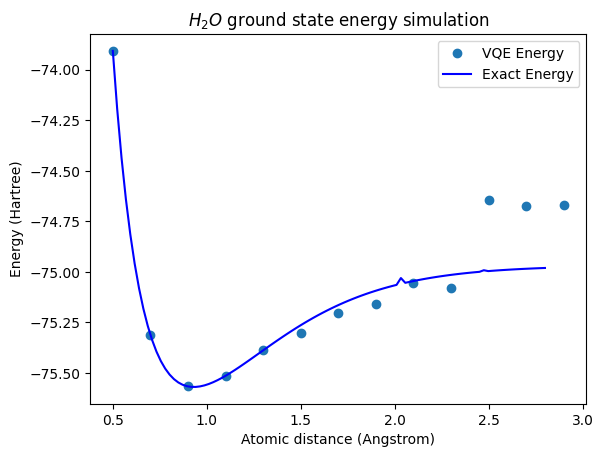

In [38]:
import time 

distances = np.arange(0.5, 3, 0.2)
vqe_energies = []
optimizer = COBYLA(maxiter=10)
noiseless_estimator = Estimator(approximation=True)

for dist in distances:
    tim = time.time()
    (qubit_op, num_particles, num_spatial_orbitals, problem, mapper) = get_qubit_op_H2O(dist)

    init_state = HartreeFock(num_spatial_orbitals, num_particles, mapper)
    var_form = UCCSD(
        num_spatial_orbitals, num_particles, mapper, initial_state=init_state
    )
    
    vqe = VQE(
        noiseless_estimator,
        var_form,
        optimizer,
        initial_point=[0] * var_form.num_parameters,
    )
    tim2 = time.time()
    print("test", tim2-tim)
    vqe_calc = vqe.compute_minimum_eigenvalue(qubit_op)
    vqe_result = problem.interpret(vqe_calc).total_energies[0].real
    print("test2", time.time() - tim2)
    vqe_energies.append(vqe_result)
    print(f"Interatomic Distance: {np.round(dist, 2)} VQE Result: {vqe_result:.5f}")

print("All energies have been calculated")

atomic_distances, exact_energies = classic_h_oh()
plt.plot(distances, vqe_energies,'o',label = "VQE Energy")
plt.plot(atomic_distances, exact_energies, label='Exact Energy', color='blue')
plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.title("$H_2O$ ground state energy simulation")
plt.legend()
plt.show()


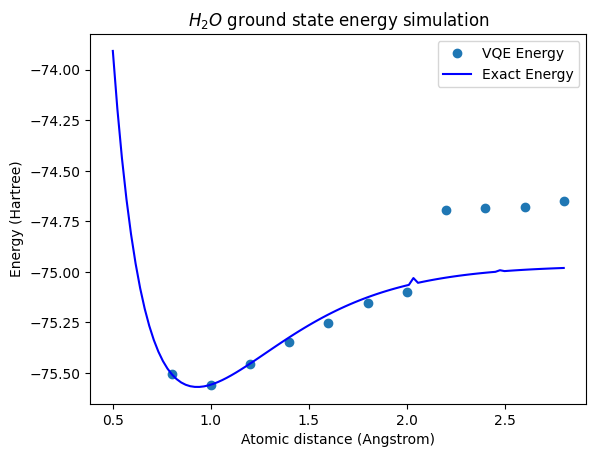

In [37]:
# atomic_distances, exact_energies = classic_h_oh()
plt.plot(distances, vqe_energies,'o',label = "VQE Energy")
plt.plot(atomic_distances, exact_energies, label='Exact Energy', color='blue')
plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.title("$H_2O$ ground state energy simulation")
plt.legend()
plt.show()

test 2.4908738136291504
test2 12.184739351272583
Interatomic Distance: 2.5 VQE Result: -74.64316
test 2.477548837661743
test2 12.472957134246826
Interatomic Distance: 2.56 VQE Result: -74.64515
test 2.3124771118164062
test2 14.210859060287476
Interatomic Distance: 2.61 VQE Result: -74.67758
test 5.659177541732788
test2 13.436775922775269
Interatomic Distance: 2.67 VQE Result: -74.64819
test 2.504563331604004
test2 12.814010620117188
Interatomic Distance: 2.72 VQE Result: -74.64939
test 5.185687303543091
test2 13.163463592529297
Interatomic Distance: 2.78 VQE Result: -74.67186
test 7.206566095352173
test2 13.496070623397827
Interatomic Distance: 2.83 VQE Result: -74.67012
test 5.8062074184417725
test2 15.37940788269043
Interatomic Distance: 2.89 VQE Result: -74.66855
test 2.283881664276123
test2 14.127487421035767
Interatomic Distance: 2.94 VQE Result: -74.66708
test 2.0931975841522217
test2 12.397898435592651
Interatomic Distance: 3.0 VQE Result: -74.65263
All energies have been calcul

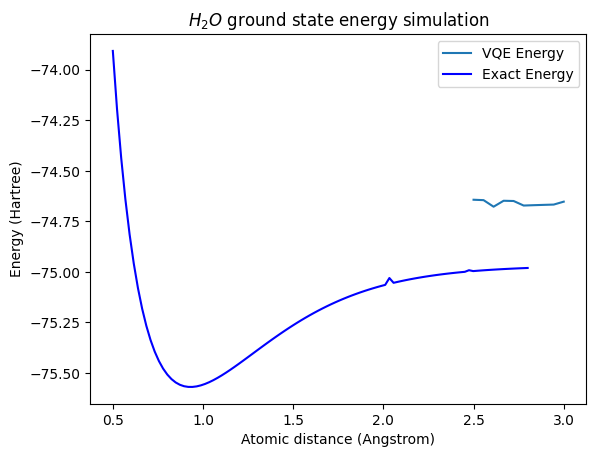

In [31]:
import time 
from qiskit_algorithms.minimum_eigensolvers import VQE
from qiskit_nature.second_q.transformers import FreezeCoreTransformer
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo
from qiskit_nature.second_q.mappers import ParityMapper,BravyiKitaevMapper,BravyiKitaevSuperFastMapper
from qiskit_nature.second_q.circuit.library import UCCSD, HartreeFock
from qiskit_algorithms.optimizers import SLSQP,COBYLA
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_aer.primitives import Estimator
import matplotlib.pyplot as plt
import numpy as np
import psi4

def classic_h_oh(memory='2 GB'):
    # Set memory and output file
    psi4.set_memory(memory)
    psi4.core.set_output_file('h2o_energy_plot.dat', False)

    # Define a range of O-H bond distances to calculate the energy for
    # Note: Typically, the bond angle in water is 104.5 degrees, and we keep that constant here.
    # You might want to vary the bond angle as well for a more thorough analysis.
    oh_distances = np.linspace(0.5, 2.8, 100)  # in Angstroms

    # Arrays to store energies
    exact_energies = []

    # Loop over the O-H distances and calculate the exact energy using Psi4
    for oh_distance in oh_distances:
        # Define the molecule at the current distance and bond angle
        h2o = psi4.geometry(f"""
            0 1
            O
            H 1 {oh_distance}
            H 1 {oh_distance} 2 180
            """)

        # Set the basis and options
        psi4.set_options({'basis': 'sto-6g', 'reference': 'rhf'})

        # Calculate the energy
        energy = psi4.energy('scf')
        exact_energies.append(energy)
        print("At distance", oh_distance, "the energy is", energy)

    # Convert O-H distances to Angstroms for the plot
    # oh_distances *= 0.529177  # Convert from Bohr radii to Angstroms if necessary

    # Plot the energies
    return oh_distances, exact_energies

def get_qubit_op_H2O(dist):
    # Define the molecular structure of H2O
    # Real O-H bond length in angstroms
    

    # Define the coordinates
    molecule = MoleculeInfo(
        symbols=["H", "O", "H"],
        coords=([-dist, 0, 0.0],  # Oxygen at origin
                [0,0,0],  # First Hydrogen
                [dist, 0.0, 0.0]),
        multiplicity=1,  # 2 * spin + 1; singlet state
        charge=0,
    )
    driver = PySCFDriver.from_molecule(molecule,basis='sto-6g')

    # Get properties
    properties = driver.run()

    # Now you can get the reduced electronic structure problem
    problem = FreezeCoreTransformer(
        freeze_core=True, remove_orbitals=[-3, -2]
    ).transform(properties)

    num_particles = problem.num_particles
    num_spatial_orbitals = problem.num_spatial_orbitals

    mapper = BravyiKitaevMapper()
    qubit_op = mapper.map(problem.second_q_ops()[0])
    return qubit_op, num_particles, num_spatial_orbitals, problem, mapper


distances = np.linspace(2.5, 3, 10)
vqe_energies = []
optimizer = COBYLA(maxiter=10)
noiseless_estimator = Estimator(approximation=True)

for dist in distances:
    tim = time.time()
    (qubit_op, num_particles, num_spatial_orbitals, problem, mapper) = get_qubit_op_H2O(dist)

    init_state = HartreeFock(num_spatial_orbitals, num_particles, mapper)
    var_form = UCCSD(
        num_spatial_orbitals, num_particles, mapper, initial_state=init_state
    )
    
    vqe = VQE(
        noiseless_estimator,
        var_form,
        optimizer,
        initial_point=[0] * var_form.num_parameters,
    )
    tim2 = time.time()
    print("test", tim2-tim)
    vqe_calc = vqe.compute_minimum_eigenvalue(qubit_op)
    vqe_result = problem.interpret(vqe_calc).total_energies[0].real
    print("test2", time.time() - tim2)
    vqe_energies.append(vqe_result)
    print(f"Interatomic Distance: {np.round(dist, 2)} VQE Result: {vqe_result:.5f}")

print("All energies have been calculated")

atomic_distances, exact_energies = classic_h_oh()
plt.plot(distances, vqe_energies,label = "VQE Energy")
plt.plot(atomic_distances, exact_energies, label='Exact Energy', color='blue')
plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.title("$H_2O$ ground state energy simulation")
plt.legend()
plt.show()


In [30]:
for i, val in enumerate(exact_energies):
    #print(i)
    if (i+1) % 2:
        print(str(i) + ": " + str(val - vqe_energies[int(i/2)]))
        #print(vqe_energies[int(i/2)])

0: 6.127327139893168e-05
2: 0.004590549203157934
4: 0.0064789452115405766
6: 0.00682063511612796
8: 0.006282202111492552
10: 0.005273346311341243
12: 0.004045600605806499
14: 0.0027514080839949884
16: 0.0014808084858088932
18: 0.00028486938609262324
20: -0.0008092168587268134
22: -0.0017885915927422502
24: -0.0026489608842723555
26: -0.0033911947182900803
28: -0.004019212099564129
30: -0.004538591884369225
32: -0.004955727656209774
34: -0.005277415461591772
36: 0.0003263263118071791
38: 0.013500510651553554
40: 0.02370974884267696
42: 0.031133329495247608
44: 0.035956435922599894
46: 0.038373482844207274
48: 0.038590138106343375
50: 0.036821759388189435
52: 0.033290771161148314
54: 0.028221927562313454
56: 0.021837800106965233
58: 0.025005373785418783
60: 0.01569294046932157
62: 0.02544055019042446
64: 0.030965334499057917
66: 0.06631661132030331
68: 0.04369590201488904
70: 0.05927999640370274
72: -0.33834387208104033
74: 0.05796490487999506
76: 0.061691230925347895
78: -0.667628415643